In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az
import pandas as pd
import xarray as xr
from sklearn.preprocessing import scale
import scipy
from scipy.special import expit
import pytensor.tensor as pt

In [3]:
frogs = pd.read_csv('Data/reedfrogs.csv',sep=';')
frogs.head()

,density,pred,size,surv,propsurv
0,10,no,big,9,0.9
1,10,no,big,10,1.0
2,10,no,big,7,0.7
3,10,no,big,10,1.0
4,10,no,small,9,0.9


In [5]:
#Question 1
predidx,pred = frogs['pred'].factorize()
sizeidx,size = frogs['size'].factorize()
with pm.Model() as frog_m:
    D = pm.MutableData('D',frogs['density'].values)
    P = pm.MutableData('P',predidx)
    Si = pm.MutableData('S',sizeidx)
    T = pm.MutableData('T',frogs.index.values)
    Su = pm.MutableData('Su',frogs['surv'].values)
    
    sigma = pm.Exponential('sigma',1.0)
    a_bar = pm.Normal('a_bar',0.0,1.0)
    a     = pm.Normal('a',a_bar,sigma,shape=T.shape[0])

    p      = a[T]
    Survive     = pm.Binomial('Survive',n=D,logit_p=p,observed=Su)
    
    frog_trace = pm.sample()
    pm.compute_log_likelihood(frog_trace)

G:\Statistical_Rethinking\rethinking\Lib\site-packages\multipledispatch\dispatcher.py:27: AmbiguityWarning: 
Ambiguities exist in dispatched function _unify

The following signatures may result in ambiguous behavior:
	[ConstrainedVar, Var, Mapping], [object, ConstrainedVar, Mapping]
	[object, ConstrainedVar, Mapping], [ConstrainedVar, object, Mapping]
	[object, ConstrainedVar, Mapping], [ConstrainedVar, Var, Mapping]
	[ConstrainedVar, object, Mapping], [object, ConstrainedVar, Mapping]


Consider making the following additions:

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)
  warn(warning_text(dispatcher.name, ambiguities), AmbiguityWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: 

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.


In [6]:
with frog_m:
    frog_pp = pm.sample_prior_predictive(samples=50)
    

Sampling: [Survive, a, a_bar, sigma]


In [12]:
frog_pp.prior

<xarray.Dataset>
Dimensions:  (chain: 1, draw: 50, a_dim_0: 48)
Coordinates:
  * chain    (chain) int32 0
  * draw     (draw) int32 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * a_dim_0  (a_dim_0) int32 0 1 2 3 4 5 6 7 8 9 ... 39 40 41 42 43 44 45 46 47
Data variables:
    sigma    (chain, draw) float64 0.179 1.382 0.569 ... 0.2043 0.3551 2.242
    a_bar    (chain, draw) float64 0.1207 -0.9629 0.2884 ... -0.1127 -0.2456
    a        (chain, draw, a_dim_0) float64 -0.07575 0.3119 ... -1.195 -3.675
Attributes:
    created_at:                 2023-02-13T04:53:44.733223
    arviz_version:              0.14.0
    inference_library:          pymc
    inference_library_version:  5.0.1

array([<AxesSubplot: title={'center': 'sigma'}>,
       <AxesSubplot: title={'center': 'a_bar'}>,
       <AxesSubplot: title={'center': 'a'}>], dtype=object)

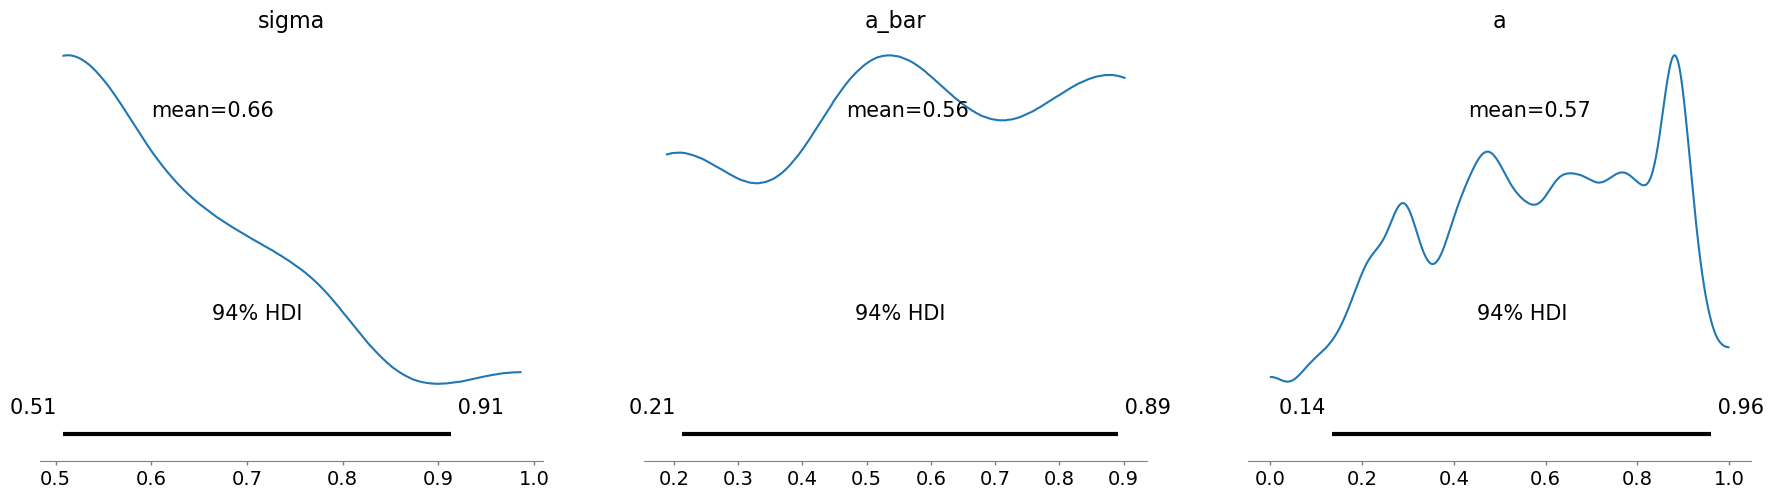

In [15]:
az.plot_posterior(expit(frog_pp.prior),combine_dims={'chain','draw','a_dim_0'})

<AxesSubplot: title={'center': 'Survive'}>

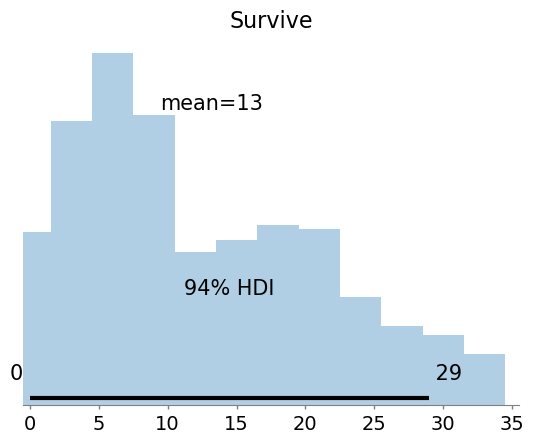

In [18]:
az.plot_posterior(frog_pp.prior_predictive,combine_dims={'chain','draw','Survive_dim_0'})

In [19]:
predidx,pred = frogs['pred'].factorize()
sizeidx,size = frogs['size'].factorize()
with pm.Model() as frog_m:
    D = pm.MutableData('D',frogs['density'].values)
    P = pm.MutableData('P',predidx)
    Si = pm.MutableData('S',sizeidx)
    T = pm.MutableData('T',frogs.index.values)
    Su = pm.MutableData('Su',frogs['surv'].values)
    
    sigma = pm.Exponential('sigma',10.0)
    a_bar = pm.Normal('a_bar',0.0,1.0)
    a     = pm.Normal('a',a_bar,sigma,shape=T.shape[0])

    p      = a[T]
    Survive     = pm.Binomial('Survive',n=D,logit_p=p,observed=Su)

    frog_pp_10 = pm.sample_prior_predictive(samples=50)
    #pm.compute_log_likelihood(frog_trace)

Sampling: [Survive, a, a_bar, sigma]


<AxesSubplot: title={'center': 'Survive'}>

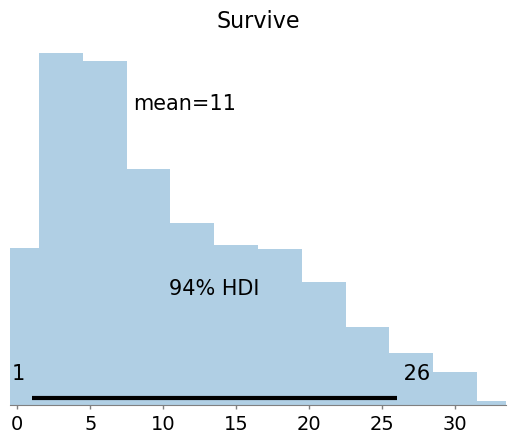

In [20]:
az.plot_posterior(frog_pp_10.prior_predictive,combine_dims={'chain','draw','Survive_dim_0'})

In [21]:
with pm.Model() as frog_m:
    D = pm.MutableData('D',frogs['density'].values)
    P = pm.MutableData('P',predidx)
    Si = pm.MutableData('S',sizeidx)
    T = pm.MutableData('T',frogs.index.values)
    Su = pm.MutableData('Su',frogs['surv'].values)
    
    sigma = pm.Exponential('sigma',.1)
    a_bar = pm.Normal('a_bar',0.0,1.0)
    a     = pm.Normal('a',a_bar,sigma,shape=T.shape[0])

    p      = a[T]
    Survive     = pm.Binomial('Survive',n=D,logit_p=p,observed=Su)

    frog_pp_01 = pm.sample_prior_predictive(samples=50)

Sampling: [Survive, a, a_bar, sigma]


<AxesSubplot: title={'center': 'Survive'}>

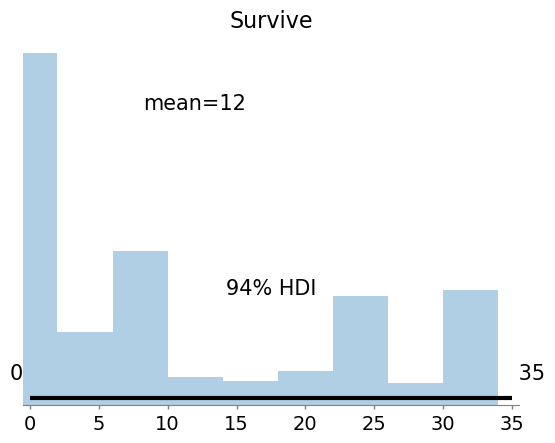

In [22]:
az.plot_posterior(frog_pp_01.prior_predictive,combine_dims={'chain','draw','Survive_dim_0'})

In [ ]:
# Question 2

